# Capstone Project 2 - Pitchfork.com Dataset Exploratory Data Analysis
# Michael Phillips

## Introduction

Pitchfork is one of the most influential music news and review sites currently in operation. Launched in 1995, the site has slowly grown over the years into the industry powerhouse it is today, boasting over 5 million global unique visitors per month. Musical acts can achieve overnight success with a positive Pitchfork review. Bands like Arcade Fire, The National, and Deafheaven have all benefited from the Pitchfork 'bump'.

This exploration will look at preliminary metrics pulled from the data to get a sense of what the dataset holds and to provide context for the Natural Language Processing (NLP) analysis found in this repository. Curiously, Pitchfork does not allow a user to filter and aggregate their reviews like I will do here. 

## The Data

The main part of this dataset is the actual review texts, which will be examined separately. 

In this notebook, we will be looking at the review metadata - trends within the reviews as a whole including top artists, how reviews fluctuate over time, and differences between the many reviewers Pitchfork has worked with over the years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('merged_review_data.csv', index_col='Unnamed: 0')
df.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,genre,label
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0,electronic,virgin
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0,metal,hathenter
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,rock,static shock
3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,rock,fashionable idiots
4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0,rock,kill rock stars


## How have reviews varied over time?

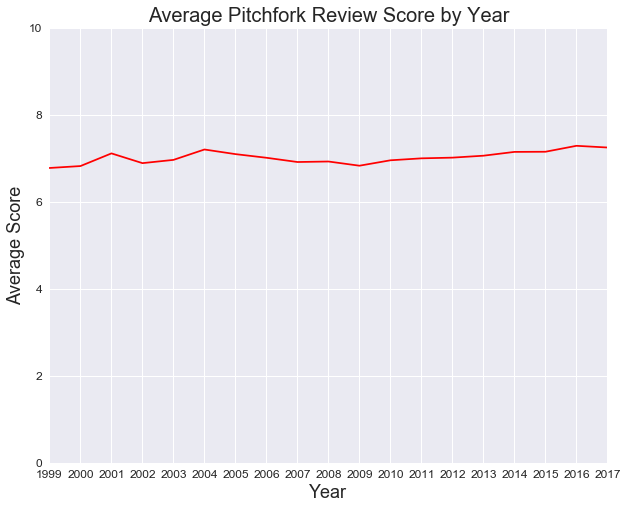

In [3]:
# change publication date to datetime object
df['pub_date'] = pd.to_datetime(df['pub_date'])

# aggregate data for plotting
year_rev = pd.pivot_table(df, index='pub_year', values='score')

# create plot
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.plot(year_rev, color='red')

# plot formatting
min = 1999
max = 2017
plt.axis([min, max, 0, 10])
plt.xticks(np.arange(min, max+1, 1.0), fontsize=12);
plt.yticks(fontsize=12)
plt.title("Average Pitchfork Review Score by Year",fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Average Score", fontsize=18)


I think the downward trend in the early to mid 2000's might be attributable to Pitchfork really coming into its own during this time. They were trying to make a name for themselves and might have been more likely to give decent albums slightly lower then average scores. From about 2010 onward, Pitchfork had solidified their place within the music criticsm landscape and no longer had to rely on controversial opinions to fuel traffic. 

This is just one interpretation of the data based on my knowledge of the site.

## Distribution of Scores

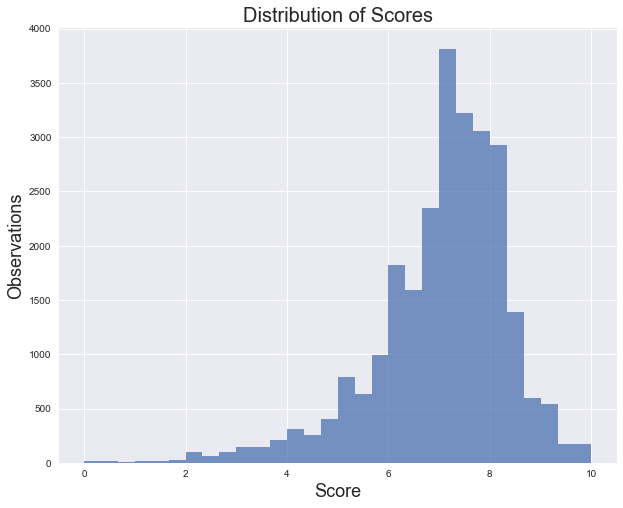

In [8]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

plt.title('Distribution of Scores', fontsize=20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Observations', fontsize=18)
ax.hist(df.score, bins=30, alpha=0.75);

This histogram matches with my own perceived spread of scores throughout the years on Pitchfork. A 7 score means the album is decent. Anything above that generally means it has something to offer the listener, especially if you are a fan of the artist or genre. Higher than a 9 is worth checking out regardless of whether you are a fan of the artist or genre. Lower than a 7 and you know there are issues with the album. 5's and lower are comparatively rarer and generally mean the album has very few redeeming qualities.

# Albums that received a perfect 10.0
Pitchfork rarely gives a perfect 10. Let's see which albums over the years have gotten one.

In [5]:
ten_albums = df.loc[df['score'] == 10,('title','artist')].drop_duplicates()
print("%i albums have received a 10." % len(ten_albums))

76 albums have received a 10.


In [37]:
pd.set_option('display.max_rows', 100)
ten_albums.sort_values(by='artist')

,title,artist
24195,source tags and codes,...and you will know us by the trail of dead
1779,people's instinctive travels and the paths of ...,a tribe called quest
12732,paul's boutique,beastie boys
21109,music has the right to children,boards of canada
264,blood on the tracks,bob dylan
25643,i see a darkness,bonnie prince billy
456,another green world,brian eno
18443,born to run: 30th anniversary edition,bruce springsteen
7887,tago mago [40th anniversary edition],can
6279,voodoo,dangelo


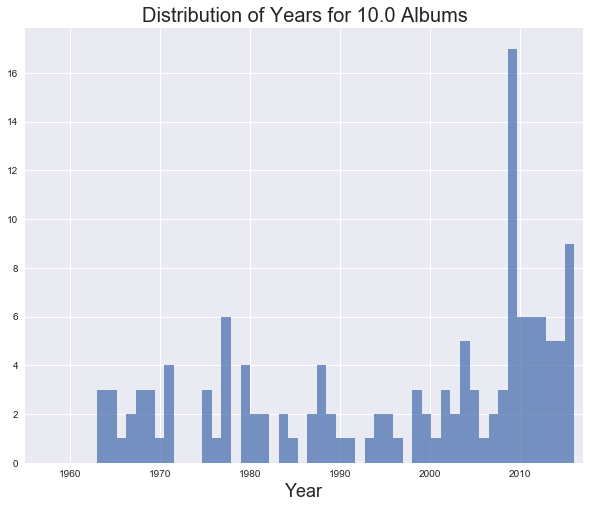

In [26]:
# distribution of 10.0 albums by year
ten_album_years = df.loc[df['score'] == 10,('title','artist', 'year')]

ten_album_years.hist(column='year', bins=50, figsize=(10,8), alpha=0.75)
plt.title('Distribution of Years for 10.0 Albums', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.xlim([1955,2017]);

## Albums that received 1.0 or lower
An album that scores a 1.0 or lower on Pitchfork is, in the site's opionion, historically bad. 

In [38]:
zero_albums = df.loc[df['score'] <= 1.0,('title','artist', 'score')].drop_duplicates()
print("%i albums received a 1.0 or lower." % len(zero_albums))

35 albums received a 1.0 or lower.


In [40]:
zero_albums.sort_values(by='artist').sort_values(by='score')

,title,artist,score
22370,liz phair,liz phair,0.0
25434,nyc ghosts & flowers,sonic youth,0.0
20407,travistan,travis morrison,0.0
19505,relaxation of the asshole,robert pollard,0.0
15299,this is next,various artists,0.0
16961,shine on,jet,0.0
24386,feel no fade,push kings,0.1
13433,angles,dan le sac vs. scroobius pip,0.2
25531,vue,vue,0.2
21668,the cunt chronicles,shat,0.2


Perhaps the most infamous Pitchfork review ever published was for the album 'Shine On' by the band Jet. One of only 6 reviews to score a 0.0, its safe to say the reviewer did not enjoy it.

Check out the review here (NSFW):

http://pitchfork.com/reviews/albums/9464-shine-on/

## Album Labels With the Highest Average Review Score

In [27]:
df1 = pd.pivot_table(df, index=['label'], values=['score'], aggfunc='count')
df1.columns = ['scores_count']
df2 = pd.pivot_table(df, index=['label'], values=['score'])
df2.columns = ['scores_mean']
label_info = pd.concat((df1, df2), axis=1)
label_info.head()

,scores_count,scores_mean
label,,
deux,1,5.800000
!k7,85,6.983529
+1,4,6.625000
00:02:59,1,7.400000
1-2-3-4 go!,2,6.750000


In [28]:
# look at top 10 labels with 20 or more releases
label_info = label_info.loc[label_info['scores_count'] > 19, :]
label_info_sort = label_info.sort_values(by='scores_mean', ascending=False)
label_info_sort = label_info_sort[0:10]
label_info_sort

,scores_count,scores_mean
label,,
hip-o select,22,8.513636
paradise of bachelors,23,7.995652
light in the attic,88,7.982955
what's your rupture?,26,7.957692
tzadik,42,7.940476
soul jazz,42,7.876190
numero group,67,7.858209
table of the elements,20,7.840000
rhino,125,7.830400


There are so many small, boutique music labels that come and go over the years, its hard to keep track of them. Hip-O Select had remarkable success, at least measured by review score. Let's see what their albums were.

In [42]:
df.head()
hipodf = df.loc[df['label'] == 'hip-o select', ('title', 'artist', 'score', 'year', 'label')]
hipodf

,title,artist,score,year,label
9232,"james brown: the singles, volume ten: 1975-1979",james brown,5.1,2011.0,hip-o select
10228,"the singles, vol. 9: 1973-1975",james brown,7.7,2010.0,hip-o select
11299,"the singles, vol. 8: 1972-1973",james brown,8.4,2009.0,hip-o select
11582,live at the el mocambo,elvis costello,8.4,2009.0,hip-o select
12197,"the singles, vol. 7: 1970-1972",james brown,8.6,2009.0,hip-o select
12360,"the complete motown singles, vol. 11a: 1971",various artists,8.9,2009.0,hip-o select
12796,"the singles, vol. 6: 1969-1970",james brown,8.4,2009.0,hip-o select
13988,johnny b. goode: his complete '50s chess recor...,chuck berry,9.5,2008.0,hip-o select
14177,"the singles, volume five: 1967-1969",james brown,7.9,2008.0,hip-o select
14401,"the complete motown singles, vol. 9: 1969",various artists,9.4,2007.0,hip-o select


## Artists With the Highest Average Review Score

In [30]:
df1 = pd.pivot_table(df, index=['artist'], values=['score'], aggfunc='count')
df1.columns = ['scores_count']
df2 = pd.pivot_table(df, index=['artist'], values=['score'])
df2.columns = ['scores_mean']
artist_info = pd.concat((df1, df2), axis=1)

# top 10 artists with at least 3 releases
artist_info = artist_info.loc[artist_info['scores_count'] > 3, :]
artist_info_sort = artist_info.sort_values(by='scores_mean', ascending=False)
artist_info_sort = artist_info_sort[0:10]
artist_info_sort

,scores_count,scores_mean
artist,,
elvis costello & the attractions,4,9.750000
my bloody valentine,6,9.700000
ultramagnetic mc's,4,9.700000
the velvet underground,13,9.592308
marvin gaye,4,9.500000
otis redding,6,9.500000
fleetwood mac,7,9.457143
disco inferno,6,9.333333
young marble giants,4,9.300000


Interesting results here. Mostly older bands with classic albums that have had time to grow in stature are able to consistently score highly on Pitchfork. 

## Artists With the Lowest Average Review Score

In [31]:
# bottom 10 artists with at least 3 releases
artist_info = artist_info.loc[artist_info['scores_count'] > 3, :]
artist_info_sort = artist_info.sort_values(by='scores_mean')
artist_info_sort = artist_info_sort[0:10]
artist_info_sort

,scores_count,scores_mean
artist,,
ghostland observatory,4,1.500000
mika,4,1.500000
wolfie,4,1.850000
jet,4,1.850000
jessie j,4,2.000000
chiddy bang,6,2.100000
"does it offend you, yeah?",4,2.300000
bravehearts,6,2.500000
whirlwind heat,6,2.766667


Mostly newer acts on this list. Some of these bands are gimmick or 'joke' bands. Pitchfork seems to take reviewing music seriously, they have little patience for artists that don't take the music they produce seriously.

## Average Review Score by Genre

In [32]:
df1 = pd.pivot_table(df, index=['genre'], values=['score'], aggfunc='count')
df1.columns = ['scores_count']
df2 = pd.pivot_table(df, index=['genre'], values=['score'])
df2.columns = ['scores_mean']
genre_info = pd.concat((df1, df2), axis=1)

genre_info = genre_info.loc[genre_info['scores_count'] > 3, :]
genre_info_sort = genre_info.sort_values(by='scores_count', ascending=False).sort_values(by='scores_mean', ascending=False)
genre_info_sort = genre_info_sort[0:20]
genre_info_sort

,scores_count,scores_mean
genre,,
global,268,7.416418
experimental,2044,7.371575
jazz,496,7.341129
folk/country,764,7.226963
rock,10858,6.991398
metal,960,6.989896
electronic,4341,6.935706
pop/r&b,1666,6.928631
rap,1872,6.904380


## Trends in Pitchfork Reviewers

In [43]:
df1 = pd.pivot_table(df, index=['author'], values=['score'], aggfunc='count')
df1.columns = ['scores_count']
df2 = pd.pivot_table(df, index=['author'], values=['score'])
df2.columns = ['scores_mean']
author_info = pd.concat((df1, df2), axis=1)

print('There have been %i reviewers on Pitchfork' % len(author_info))

# reviewers with the highest number of reviews
author_info = author_info.loc[author_info['scores_count'] > 3, :]
author_info_sort = author_info.sort_values(by='scores_count', ascending=False)
author_info_sort = author_info_sort[0:20]
author_info_sort

There have been 432 reviewers on Pitchfork


,scores_count,scores_mean
author,,
joe tangari,1123,7.404630
ian cohen,990,6.310505
stephen m. deusner,898,6.998330
mark richardson,715,7.612587
brian howe,703,7.088620
marc hogan,644,6.624689
stuart berman,635,7.081890
brandon stosuy,502,7.563745
nate patrin,485,7.100619


There have been just over 18,000 reviews on Pitchfork since 1999. Joe Tangari (a name that is not familiar to me) wrote about 6% of them himself. 

In [34]:
# reviewers with the highest average review score
# minimum 25 years
author_info = author_info.loc[author_info['scores_count'] > 25, :]
author_info_sort = author_info.sort_values(by='scores_mean', ascending=False)
author_info_sort = author_info_sort[0:20]
author_info_sort

,scores_count,scores_mean
author,,
brent s. sirota,48,8.097917
jenn pelly,59,8.093220
ned raggett,33,7.793939
liam singer,39,7.789744
alex linhardt,64,7.768750
seth colter walls,91,7.680220
scott plagenhoef,181,7.672928
mark richardson,715,7.612587
hank shteamer,30,7.603333


In [35]:
# reviewers with the lowest average review score
# minimum 25 reviews
author_info = author_info.loc[author_info['scores_count'] > 25, :]
author_info_sort = author_info.sort_values(by='scores_mean')
author_info_sort = author_info_sort[0:20]
author_info_sort

,scores_count,scores_mean
author,,
michael sandlin,26,5.665385
evan mcgarvey,32,5.865625
brian james,27,5.977778
brent dicrescenzo,133,6.073684
alison fields,61,6.073770
michael idov,47,6.097872
mark martelli,45,6.111111
adam moerder,308,6.137338
eric grandy,55,6.250909


Two names jump out at me here. Ian Cohen is one of the more well-known music critics around, and he is notoriously harsh as this list confirms.

Rollie Pemberton is notable because he made the jump from Pitchfork reviewer to artist himself - he released several rap albums under the name Cadence Weapon. 

## Conclusion

This initial exploration has given some context to the review texts. We have seen the artist, albums, and genres that Pitchfork writer's have generally preferred, as well as trends in the scores over time. 